In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
from scipy.stats import chi2

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost

#model accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#Evaluating model performance
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import pickle

In [2]:
insurance_df = pd.read_csv('insurance.csv')

In [3]:
insurance_df.shape

(1338, 7)

In [4]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [5]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Exploratory Data Analysis

##### Assumptions:
1. People who smoker pay higher insurance  
2. People who fewer charges pay less insurance
3. People with higher bmi also pay more

In [9]:
from ipywidgets import interactive

def size_widget(height=2.5, aspect=1):
    sns.pairplot(insurance_df,
                 diag_kind="kde",
                 hue="smoker", 
                 height=height, 
                 aspect=aspect, 
                 palette='plasma')

interactive(size_widget, height=(1,3.5,0.5), aspect=(0.5,2,0.25))

interactive(children=(FloatSlider(value=2.5, description='height', max=3.5, min=1.0, step=0.5), FloatSlider(va…

### Insight:
- Non-smokers are charges less compared to those who smoke  
- As age increases so does the charges  
- People with kids and smoke pay higher insurance than those who do not smoke  
- Smoking is an importance factor when it comes to how much a person should be charged.  

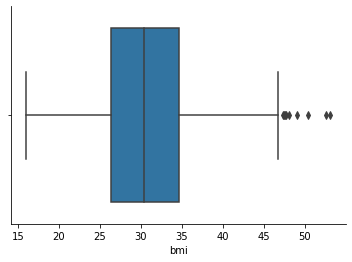

In [10]:
sns.boxplot(data=insurance_df, x="bmi")
sns.despine();

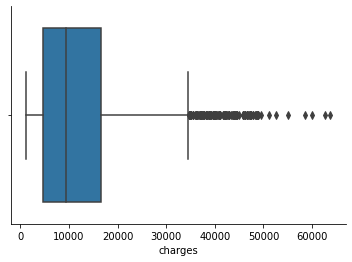

In [11]:
sns.boxplot(data=insurance_df, x="charges")
sns.despine();

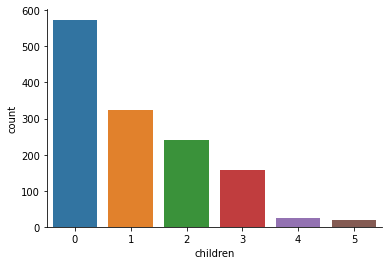

In [12]:
sns.countplot(data=insurance_df, x='children')
sns.despine();

##### Insight
- A majority of the people taking this insurance are people with no children

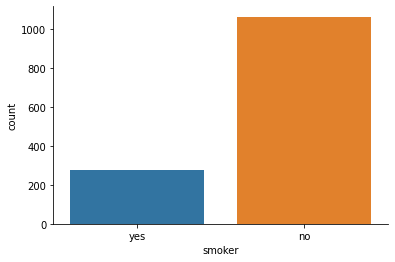

In [13]:
sns.countplot(data=insurance_df, x='smoker')
sns.despine();

##### Insight
- A majority of the people are non-smokers  

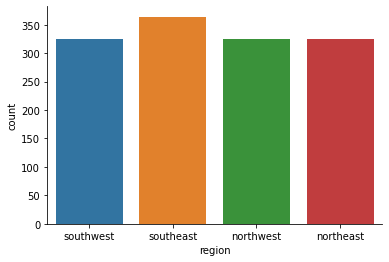

In [14]:
sns.countplot(data=insurance_df, x='region')
sns.despine();

#### Bivariate Analysis

<AxesSubplot:xlabel='charges', ylabel='sex'>

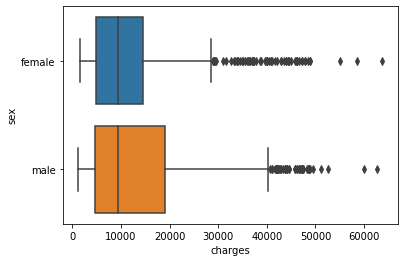

In [15]:
sns.boxplot(data=insurance_df, y='sex', x='charges')

<AxesSubplot:xlabel='children', ylabel='charges'>

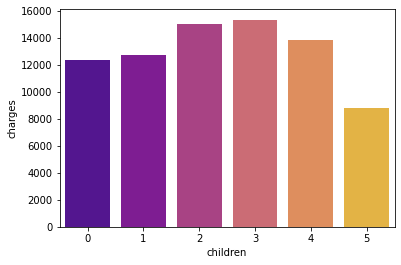

In [16]:
sns.barplot(data=insurance_df, 
            x='children', 
            y='charges',
           ci=None,
           palette='plasma')

<AxesSubplot:xlabel='children', ylabel='charges'>

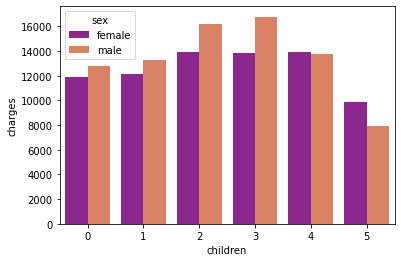

In [17]:
sns.barplot(data=insurance_df, 
            x='children', 
            y='charges',
            hue='sex',
           ci=None,
           palette='plasma')

##### Insight
- Insurance  charges for males varies more when compared to females. Males with 2 or three kids get charge 15 000

<AxesSubplot:xlabel='smoker', ylabel='charges'>

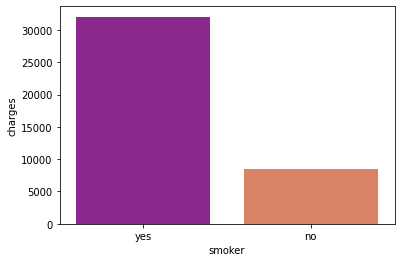

In [18]:
sns.barplot(data=insurance_df, 
            x='smoker', 
            y='charges',
           ci=None,
           palette='plasma')

In [19]:
dataset_table=pd.crosstab(insurance_df['sex'],insurance_df['smoker'])

observed_values=dataset_table.values
val=stats.chi2_contingency(dataset_table)
expected_values=val[3]

#degree of freedom
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
degree_free=(no_of_rows-1)*(no_of_columns-1)
print("Degree of freedom: ",degree_free)
alpha=0.05

chi_square=sum([(o-e)**2./e for o,e in zip(observed_values,expected_values)])
chi_square_statistic=chi_square[0]+chi_square[1]

critical_value=chi2.ppf(q=1-alpha, df=degree_free)

#p_value
p_value=1-chi2.cdf(x=chi_square_statistic, df=degree_free)
print("p_value: ", p_value)
print("Significance level", alpha)
print("Degrees of freedom: ", degree_free)
print("p-value: ", p_value)

Degree of freedom:  1
p_value:  0.005324114164320548
Significance level 0.05
Degrees of freedom:  1
p-value:  0.005324114164320548


In [20]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")    

Reject H0,There is a relationship between 2 categorical variables


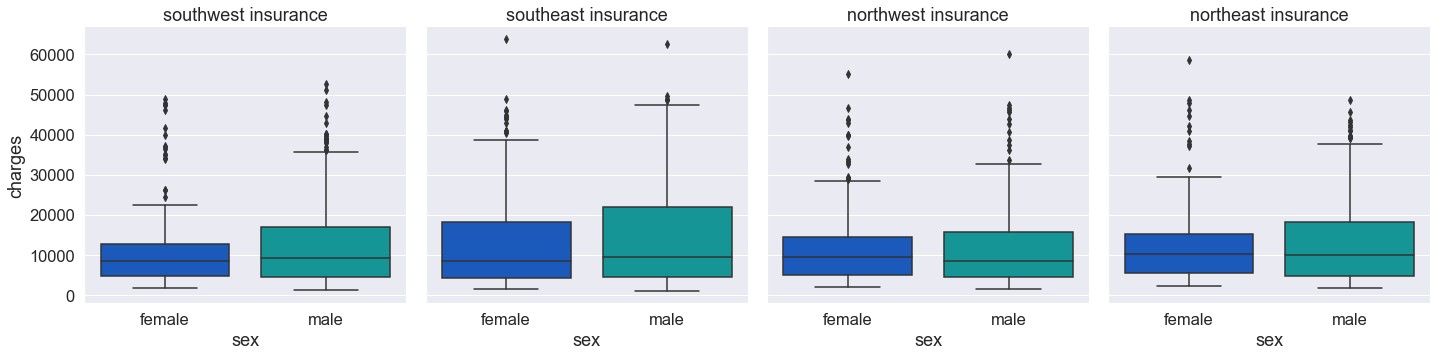

In [21]:
sns.set(style='darkgrid', font_scale=1.5)
g=sns.catplot(data=insurance_df, 
            y='charges',
           x='sex',
           kind='box',
           col='region',
           palette='winter')
g.set_titles(col_template='{col_name} insurance')

##### Insights
- Insurance prices paid by males seems to be varying more than prices paid by females across all regions

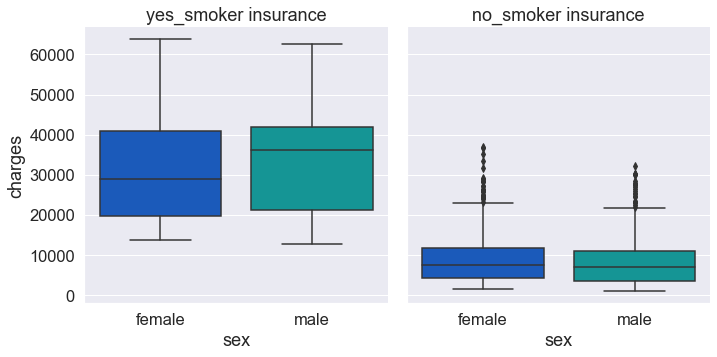

In [22]:
sns.set(style='darkgrid', font_scale=1.5)
g=sns.catplot(data=insurance_df, 
            y='charges',
           x='sex',
           kind='box',
           col='smoker',
           palette='winter')
g.set_titles(col_template='{col_name}_smoker insurance')

##### Feature engineering

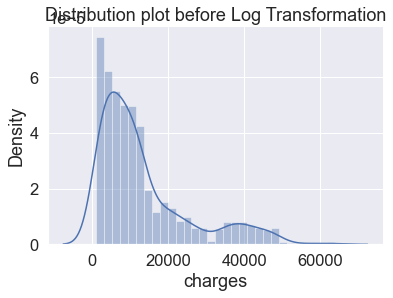

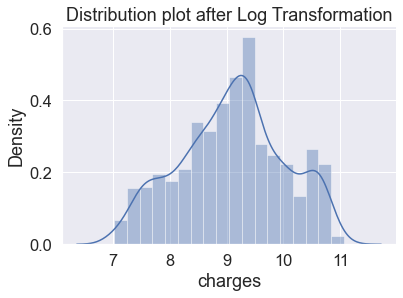

In [23]:
sns.distplot(insurance_df["charges"])
plt.title("Distribution plot before Log Transformation")
sns.despine()
plt.show()

insurance_df["charges"]=np.log(insurance_df["charges"])
sns.distplot(insurance_df["charges"])
plt.title("Distribution plot after Log Transformation")
sns.despine()
plt.show()

In [24]:
insurance_df=pd.get_dummies(insurance_df, drop_first=True)

In [25]:
X=insurance_df.drop(['charges'], axis=1)
y=insurance_df['charges']

In [26]:
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [27]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=20)

In [28]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## Training Models

#### Linear Regression 

In [29]:
lin_reg= LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [30]:
predictions = lin_reg.predict(x_test)
lin_mse=mean_squared_error(y_test, predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

0.38838872042336237

##### Decision Tree

In [31]:
tree_reg= DecisionTreeRegressor()
tree_reg.fit(x_train, y_train)

DecisionTreeRegressor()

In [32]:
scores=cross_val_score(tree_reg,
                      x_train,
                      y_train,
                      scoring="neg_mean_squared_error",
                      cv=10)
tree_rmse=np.sqrt(-scores)
tree_rmse.mean()

0.5676911761241069

##### Support Vector machines

In [33]:
svr= SVR()
svr.fit(x_train, y_train)

SVR()

In [34]:
scores=cross_val_score(svr,
                      x_train,
                      y_train,
                      scoring="neg_mean_squared_error",
                      cv=10)
svr_rmse=np.sqrt(-scores)
svr_rmse.mean()

0.40081613439126784

##### Random Forest

In [35]:
forest_reg= RandomForestRegressor()
forest_reg.fit(x_train, y_train)

RandomForestRegressor()

In [36]:
scores=cross_val_score(forest_reg,
                      x_train,
                      y_train,
                      scoring="neg_mean_squared_error",
                      cv=10)
forest_rmse=np.sqrt(-scores)
forest_rmse.mean()

0.43038651686720053

##### XGB Regressor

In [37]:
from xgboost import XGBRegressor
xgb= XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [38]:
scores=cross_val_score(xgb,
                      x_train,
                      y_train,
                      scoring="neg_mean_squared_error",
                      cv=10)
xgb_rmse=np.sqrt(-scores)
xgb_rmse.mean()

0.47480124674995555

##### AdaBoost Regressor 

In [39]:
ada= AdaBoostRegressor()
ada.fit(x_train, y_train)

AdaBoostRegressor()

In [40]:
scores=cross_val_score(ada,
                      x_train,
                      y_train,
                      scoring="neg_mean_squared_error",
                      cv=10)
ada_rmse=np.sqrt(-scores)
ada_rmse.mean()

0.5009059249556083

##### Gradient Boosting Regressor

In [41]:
grad_boost= GradientBoostingRegressor()
grad_boost.fit(x_train, y_train)

GradientBoostingRegressor()

In [42]:
scores=cross_val_score(grad_boost,
                      x_train,
                      y_train,
                      scoring="neg_mean_squared_error",
                      cv=10)
grad_boost_rmse=np.sqrt(-scores)
grad_boost_rmse.mean()

0.39973552519501226

#### Hyperparameter Tuning Using GridSearchCV

In [43]:
param_grid=[
    {"n_estimators": [3,10,30], "max_features": [2,4,6,8]},
    {"bootstrap": [False], "n_estimators": [3,10], "max_features":[2,3,4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid,
                          scoring='neg_mean_squared_error',
                          return_train_score=True,
                          cv=10)

grid_search.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [44]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [45]:
forest_reg= RandomForestRegressor(max_features=4, n_estimators=30)
forest_reg.fit(x_train,(y_train))

RandomForestRegressor(max_features=4, n_estimators=30)

In [46]:
predictions = forest_reg.predict(x_test)
forest_mse=mean_squared_error(y_test, predictions)
forest_rmse=np.sqrt(forest_mse)
forest_rmse

0.2864386068847977

In [47]:
pickle.dump(forest_reg, open('model.pkl','wb'))

In [48]:
model=pickle.load(open('model.pkl','rb'))